#  Data Science

## Problem Framing

Let's say we have an e-commerce company, and they want to increase customer engagement on their website by recommending products based on user behavior.

Formulate the problem as predicting product recommendations for users based on their past behavior on the website.

## Data Aquisition

### Identify Data Sources
- User data from the website (user_id, demographics)
- Product data (product_id, category)
- User behavior data (user_id, product_id, timestamp, interaction_type)pe)

### Collect Data

For simplicity, let's create the dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Generate a larger dataset

# User data
users = pd.DataFrame({
    'user_id': range(1, 1001),
    'age': np.random.randint(18, 60, size=1000),
    'gender': np.random.choice(['M', 'F'], size=1000)
})

# Product data
products = pd.DataFrame({
    'product_id': range(101, 201),
    'category': np.random.choice(['Electronics', 'Clothing', 'Books'], size=100)
})

# User behavior data
np.random.seed(42)
user_behavior = pd.DataFrame({
    'user_id': np.random.choice(range(1, 1001), size=5000),
    'product_id': np.random.choice(range(101, 201), size=5000),
    'timestamp': [datetime.now() - timedelta(days=i) for i in range(5000)],
    'interaction_type': np.random.choice(['view', 'purchase'], size=5000)
})

print("Dataset Created Succesfully")

Dataset Created Succesfully


## Exploratory Data Analysis

Explore the data using descriptive statistics and visualizations.

In [3]:
# Explore the generated datasets
print(users.head())
print(products.head())
print(user_behavior.head())

   user_id  age gender
0        1   56      F
1        2   59      F
2        3   38      F
3        4   23      M
4        5   41      M
   product_id     category
0         101        Books
1         102  Electronics
2         103     Clothing
3         104        Books
4         105  Electronics
   user_id  product_id                  timestamp interaction_type
0      103         178 2024-01-25 16:52:08.305424             view
1      436         155 2024-01-24 16:52:08.305424             view
2      861         127 2024-01-23 16:52:08.305424         purchase
3      271         193 2024-01-22 16:52:08.305424             view
4      107         153 2024-01-21 16:52:08.305424         purchase


In [4]:
# Explore user data
print("\nUser Data:")
print(users.describe())
print(users['gender'].value_counts())


User Data:
           user_id          age
count  1000.000000  1000.000000
mean    500.500000    38.192000
std     288.819436    12.257952
min       1.000000    18.000000
25%     250.750000    28.000000
50%     500.500000    38.000000
75%     750.250000    48.000000
max    1000.000000    59.000000
gender
F    507
M    493
Name: count, dtype: int64


In [5]:
# Explore product data
print("\nProduct Data:")
print(products.describe())
print(products['category'].value_counts())


Product Data:
       product_id
count  100.000000
mean   150.500000
std     29.011492
min    101.000000
25%    125.750000
50%    150.500000
75%    175.250000
max    200.000000
category
Electronics    39
Clothing       32
Books          29
Name: count, dtype: int64


In [6]:
# Explore user behavior data
print("\nUser Behavior Data:")
print(user_behavior.describe())
print(user_behavior['interaction_type'].value_counts())


User Behavior Data:
           user_id   product_id                      timestamp
count  5000.000000  5000.000000                           5000
mean    506.701200   151.009400  2017-03-23 04:52:08.306048512
min       1.000000   101.000000     2010-05-19 16:52:08.306405
25%     254.000000   126.000000  2013-10-20 10:52:08.306405120
50%     511.000000   152.000000  2017-03-23 04:52:08.306405120
75%     762.000000   176.000000  2020-08-23 22:52:08.305423872
max    1000.000000   200.000000     2024-01-25 16:52:08.305424
std     290.836902    28.618832                            NaN
interaction_type
view        2545
purchase    2455
Name: count, dtype: int64


### Visualise Data

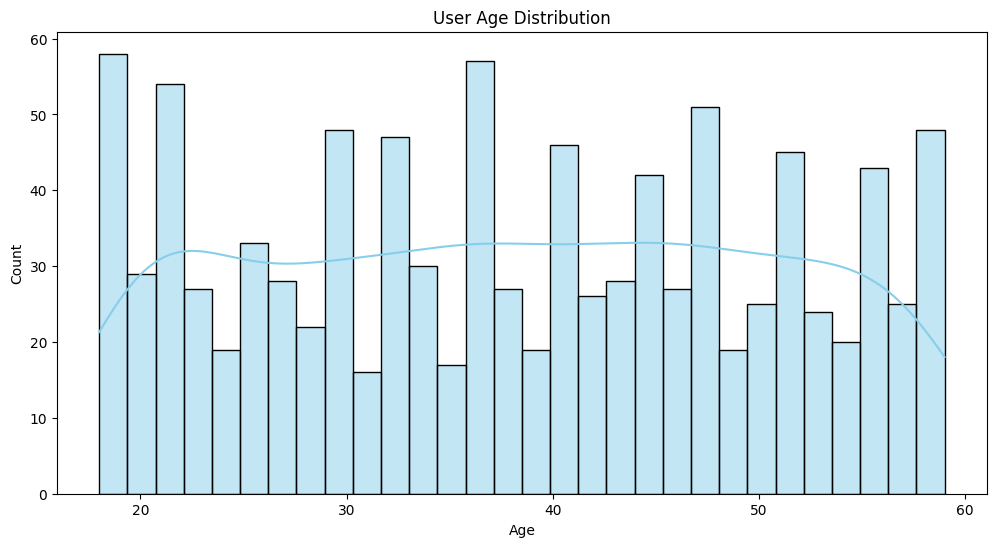

In [7]:
# User age distribution
plt.figure(figsize=(12, 6))
sns.histplot(users['age'], bins=30, kde=True, color='skyblue')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

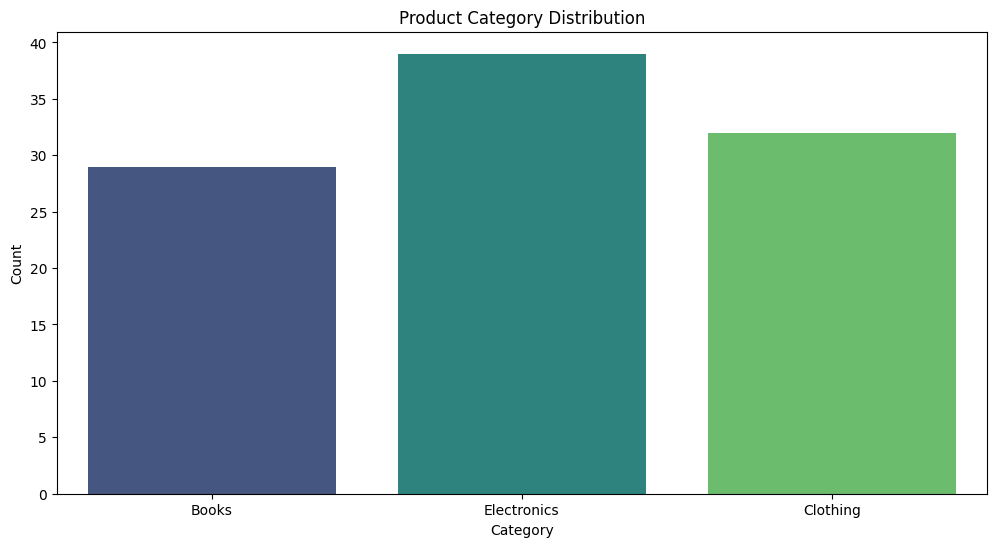

In [8]:
# Visualize product category distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=products, palette='viridis')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

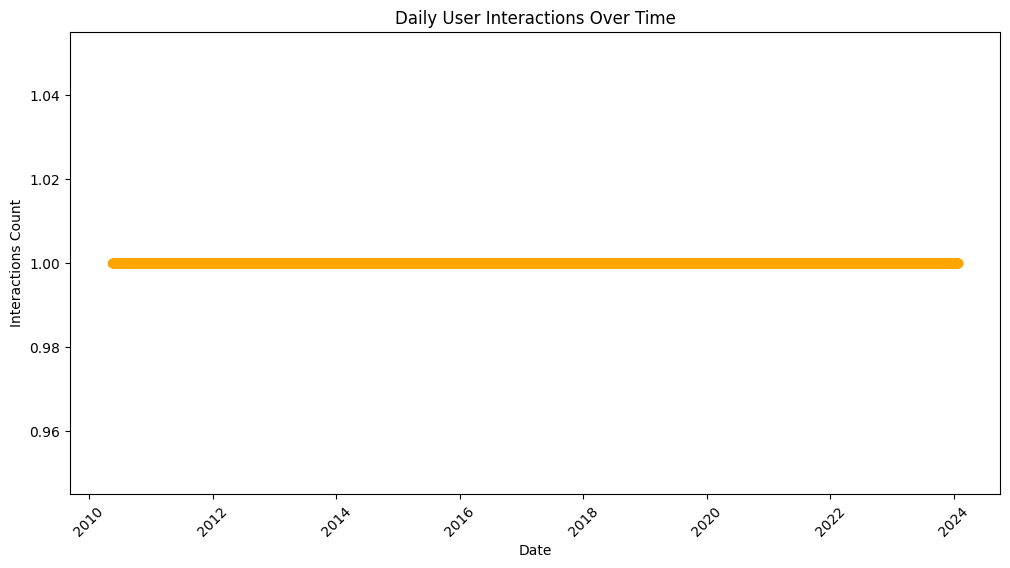

In [9]:
# Visualize user interactions over time
user_behavior['date'] = user_behavior['timestamp'].dt.date
daily_interactions = user_behavior.groupby('date').size()

plt.figure(figsize=(12, 6))
daily_interactions.plot(kind='line', marker='o', linestyle='-', color='orange')
plt.title('Daily User Interactions Over Time')
plt.xlabel('Date')
plt.ylabel('Interactions Count')
plt.xticks(rotation=45)
plt.show()

## Data Wrangling

Cleaning and preprocessing are crucial to ensure that the data is in a usable format for modeling. Handling missing values, merging relevant datasets, converting timestamps, and encoding categorical variables prepare the data for analysis and model training.

In [10]:
# Check for missing values
print(users.isnull().sum())
print(products.isnull().sum())
print(user_behavior.isnull().sum())

user_id    0
age        0
gender     0
dtype: int64
product_id    0
category      0
dtype: int64
user_id             0
product_id          0
timestamp           0
interaction_type    0
date                0
dtype: int64


In [11]:
# Merge datasets
df = pd.merge(user_behavior, users, on='user_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')

# Convert timestamp to features
df['day_of_week'] = df['timestamp'].dt.day_name()

# Encode categorical variables
df = pd.get_dummies(df, columns=['gender', 'category', 'interaction_type'])

df.head()

,user_id,product_id,timestamp,date,age,day_of_week,gender_F,gender_M,category_Books,category_Clothing,category_Electronics,interaction_type_purchase,interaction_type_view
0,103,178,2024-01-25 16:52:08.305424,2024-01-25,20,Thursday,True,False,True,False,False,False,True
1,436,155,2024-01-24 16:52:08.305424,2024-01-24,21,Wednesday,True,False,False,False,True,False,True
2,861,127,2024-01-23 16:52:08.305424,2024-01-23,53,Tuesday,True,False,False,True,False,True,False
3,271,193,2024-01-22 16:52:08.305424,2024-01-22,32,Monday,True,False,True,False,False,False,True
4,107,153,2024-01-21 16:52:08.305424,2024-01-21,35,Sunday,True,False,True,False,False,True,False


## Model Development

Choosing a modeling approach involves selecting an appropriate machine learning algorithm for the problem. Here, we use a basic K-Nearest Neighbors (KNN) classifier for predicting purchase interactions. The model is trained on the training data and evaluated on the test data.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Features and target variable
X = df[['age', 'gender_M', 'gender_F', 'category_Electronics', 'category_Clothing', 'category_Books']]
y = df['interaction_type_purchase']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.536


### Confusion matrix and Accuracy Score

1. __Confusion Matrix__
   - A confusion matrix visualizes the performance of a classification model. It shows the number of true positives, true negatives, false positives, and false negatives. In our case, it indicates how well the model predicts between 'View' and 'Purchase' interactions.
  
2. __Accuracy Score__
   - A bar plot visualizes the accuracy score of the model. It provides a clear representation of the model's overall performance on the test data.
  
These visualizations help in interpreting the model's results and assessing its accuracy in making predictions. They are valuable tools for communicating the model's performance to stakeholders and understanding where the model excels or needs improvement.

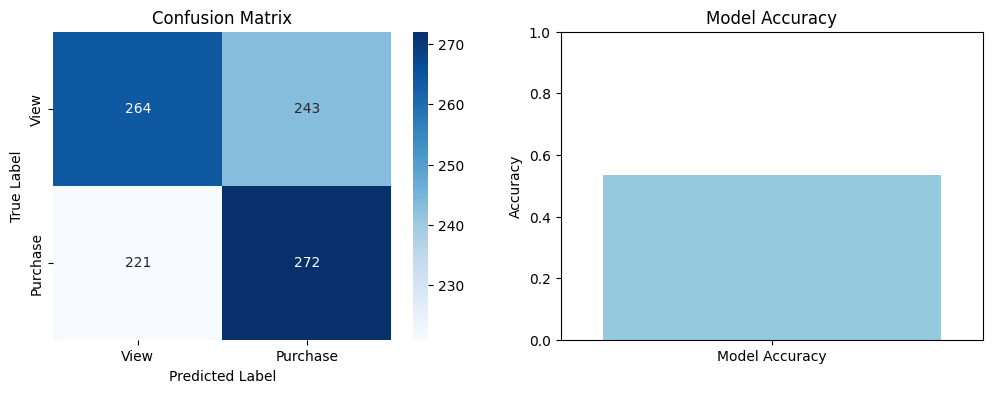

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(1,2, figsize = (12, 4))

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['View', 'Purchase'], yticklabels=['View', 'Purchase'], ax = ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

# Visualize Accuracy Score
sns.barplot(x=['Model Accuracy'], y=[accuracy], color='skyblue', ax = ax[1])
ax[1].set_title('Model Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_ylim(0, 1)

plt.show()

## Deployment

Deployment involves making the trained model available for use in real-world scenarios. This could include integrating it into existing systems, creating an API, or any other method to apply the model to new data and make predictions.

These steps in the data science life cycle are essential for transforming raw data into actionable insights. Each phase contributes to the overall goal of solving a business problem through data-driven decision-making.